***
# <span style='color:Blue'>Neural Networks Project</span>
***

## <span style='color:Blue'>Import the required packages</span>

In [1]:
import pandas as pd              # Perform operations on data frames
import numpy as np               # Perform numeric operations on data
import matplotlib.pyplot as plt  # For static visualizations
%matplotlib inline 
import seaborn as sns            # For advanced visualizations
import math
import scipy.stats as stats      # To perform statistical operations
from scipy.stats import zscore
from numpy import array
import warnings
import random
import h5py # To import h5 files

#Loading all the necessary machine learning related modules
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

#Import Tensorflow related packages
import tensorflow as tf
import keras_tuner as kt
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from keras_tuner import RandomSearch
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import random
from tensorflow.keras import backend
warnings.filterwarnings("ignore")

# Part A

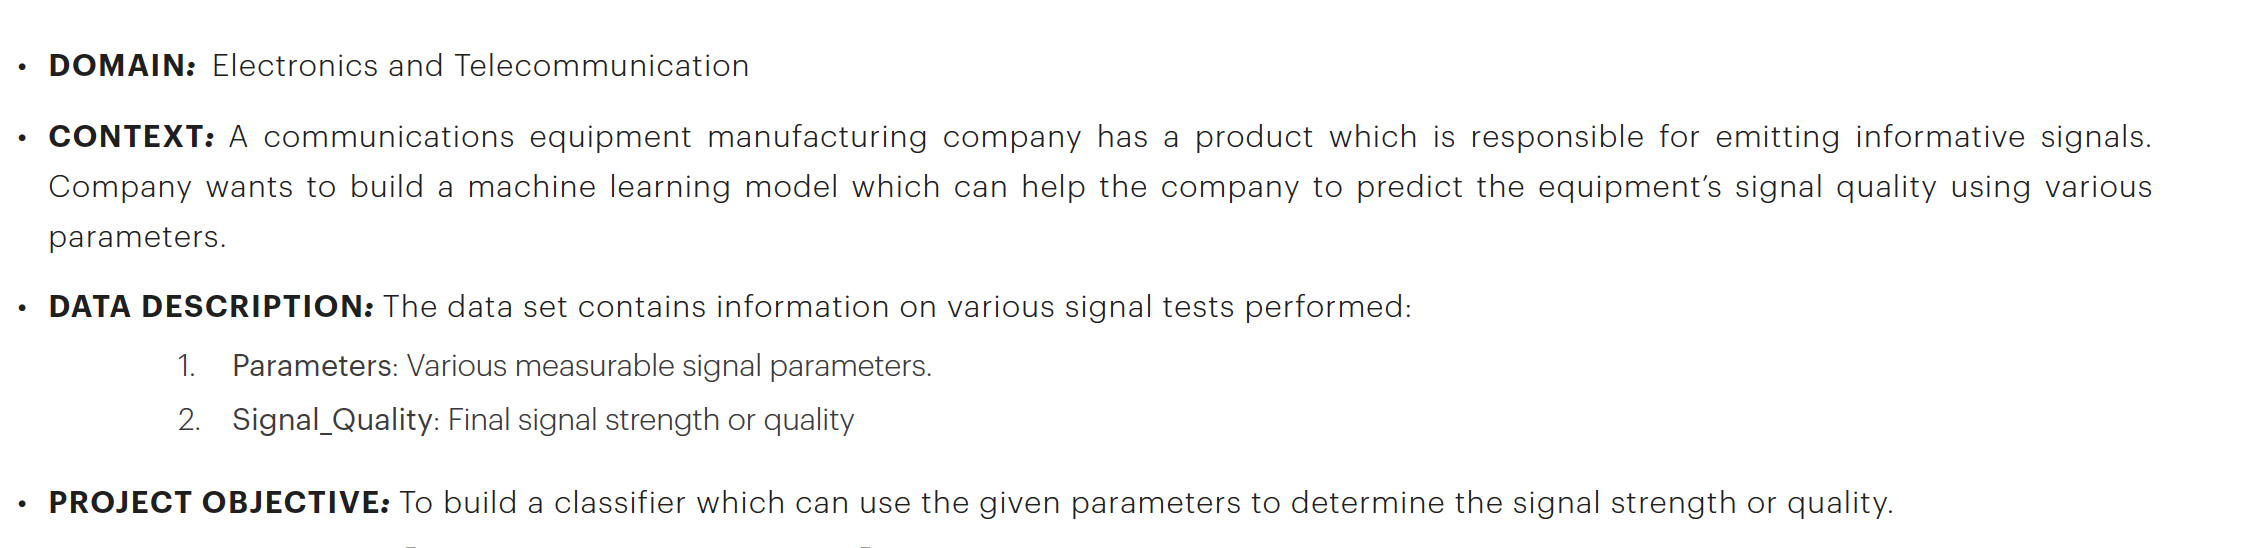

## Data import and Understanding

### Read the ‘Signals.csv’ as DataFrame and import required libraries

In [2]:
#Read the signals.csv file
signal = pd.read_csv("Signals.csv")

In [3]:
signal.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

### Check for missing values and print percentage for each attribute

In [4]:
#Check datatypes and count of missing values
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# percentage of missing values in each column
round(signal.isnull().sum() / signal.isnull().count() * 100, 2)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

**<span style='color:Blue'>Observations</span>**
- It is observed from the above analysis that there are no missing values in the dataset

### Check for presence of duplicate records in the dataset and impute with appropriate method

In [6]:
#Count of duplicate rows in the data frame
len(signal[signal.duplicated()])

240

In [7]:
#Remove the duplicate rows
signal.drop_duplicates(inplace=True, keep='first')

In [8]:
# Shape of data after removing duplicate rows
signal.shape

(1359, 12)

**<span style='color:Blue'>Observations</span>**

- There were 240 duplicate records in the dataset.
- Removed the duplicates and retained only the first record for each duplicate record in the dataframe. 

### Visualise distribution of the target variable

In [9]:
# print the frequency count of the target class
signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

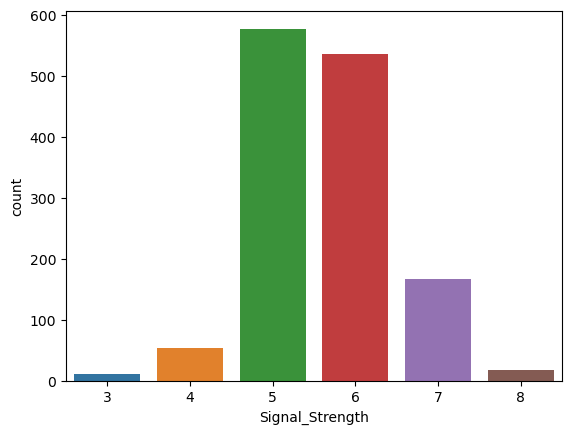

In [10]:
#Count plot showing the distribution of the target variable
sns.countplot(data=signal, x = 'Signal_Strength');

In [11]:
#Distribution of the frequency count of the target column(Signal Strength)
plt.figure(figsize=(8,8))
signal['Signal_Strength'].value_counts().plot(kind='pie', legend=False, \
                   autopct='%1.1f%%', explode=(0, 0.1, 0.2, 0.3, 0.4, 0.5), \
                   shadow=True, startangle=0);

**<span style='color:Blue'>Observations</span>**
- From the above barchart it was observed that there are a total of 6 unique classes (3,4,5,6,7,8)
- Based on the barchart and piechart it is evident that the signal strength distribution for class 5 and 6 accounts to 42.5% and 39.4% respectively. This is significantly higher compared to the other classes (3,4,7,8).
- **This shows that the classes in the data are imbalanced and hence may impact the performance of the model for the minority classes.**

### Share insights from the initial data analysis

We can use statistical summary and exploratory data analysis to derive insights from the data

In [12]:
#statistical five point summary
signal.describe().T

count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.00000   5.0000   6.0000   

                      75%        max  
Parameter 1       9.20000   15.90000  
Parameter 2       0.64000    1.58000  
Parameter 3       0.43000    1.00000  
Parameter 4       2.60000   15.50000  
Parameter 5       0.09100    0.61100  
Parameter 6      21.00000   72.00000  
Parameter 7      63.00000  289.00000  
Parameter 8       0.99782    1.00369  
Parameter 9       3.40000    4.01000  
Parameter 10      0.73000    2.00000  
Parameter 11     11.10000   14.90000  
Signal_Strength   6.00000    8.00000

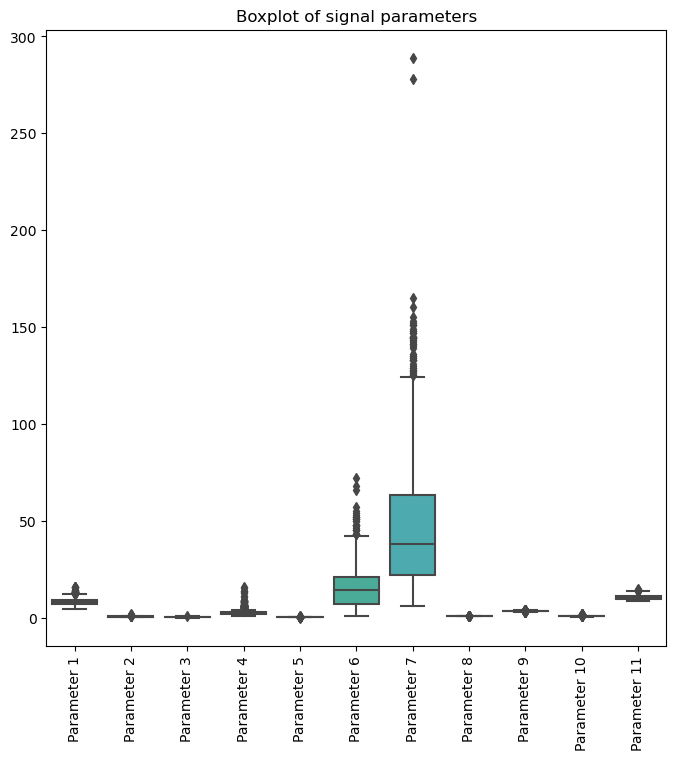

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data=signal.drop(columns=['Signal_Strength']))
plt.title("Boxplot of signal parameters")
plt.xticks(rotation=90)
plt.show()

**<span style='color:Blue'>Observations</span>**
- From the count column under statistical summary, we could see that there are total 1359 records post preprocessing. 
- From the min and max values, it can be observed that there is a lot of variation in range of values across features.
- The boxplots of signal parameters also support the similar observation. It also highlights the higher variability in values for Parameters 6 and 7, and a few outliers in parameter 7.
- This necessitates the scaling of data before applying machine learning techniques.

<Figure size 1500x1500 with 0 Axes>

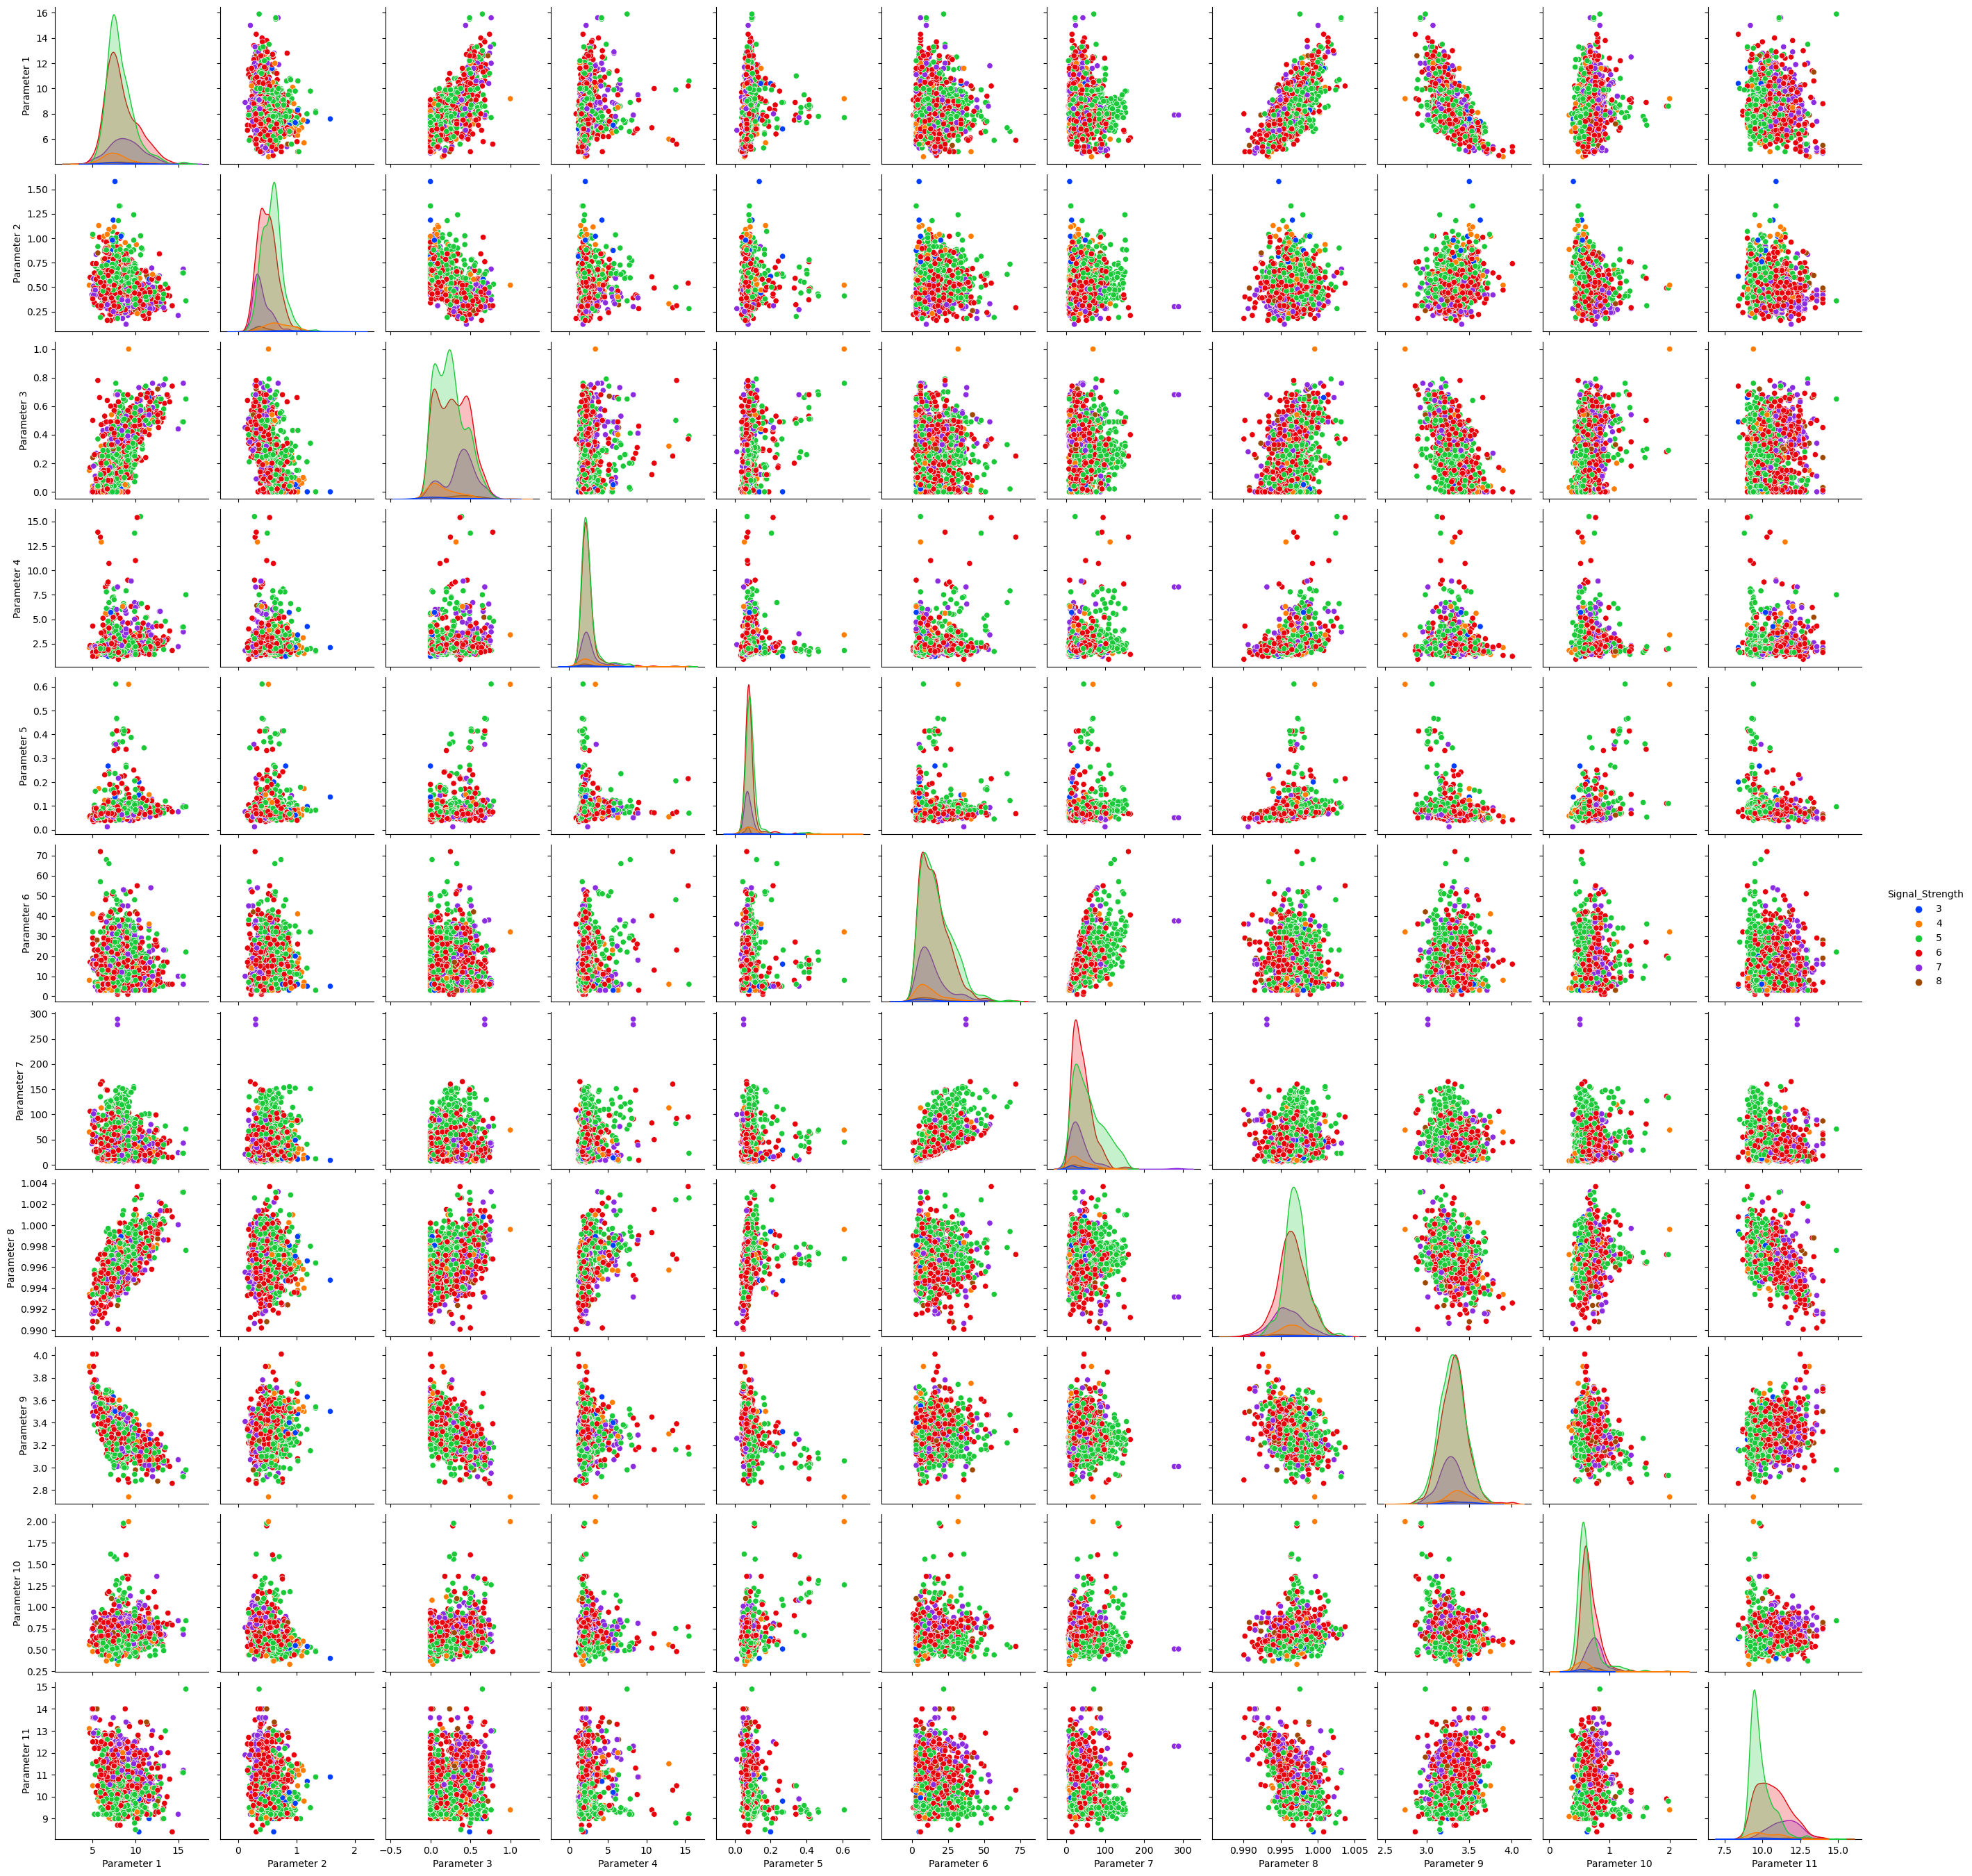

In [14]:
# Generate a pairplot with all the feature columns
plt.figure(figsize=(15,15))
sns.pairplot(data=signal, hue="Signal_Strength", diag_kind='kde', palette = 'bright' );
plt.show();

**<span style='color:Blue'>Observations</span>**

- KDE plots clearly shows the imbalance in the classes of data, dominated by classes 5, 6 and 7
- The classes show multimodal distributions over Parameter 3.
- Some of the pairs of parameters show positive correlation such as Parameters 8 and 1, whereas some of them show negative correlation e.g. Parameters 1 and 9
- The KDE plot over parameter 11, shows differences over the distributional peaks of majority classes 5, 6, and 7.

In [15]:
#Calculate the correlation 
corr=signal.drop(['Signal_Strength'], axis=1).corr()
matrix = np.triu(corr, k=1)

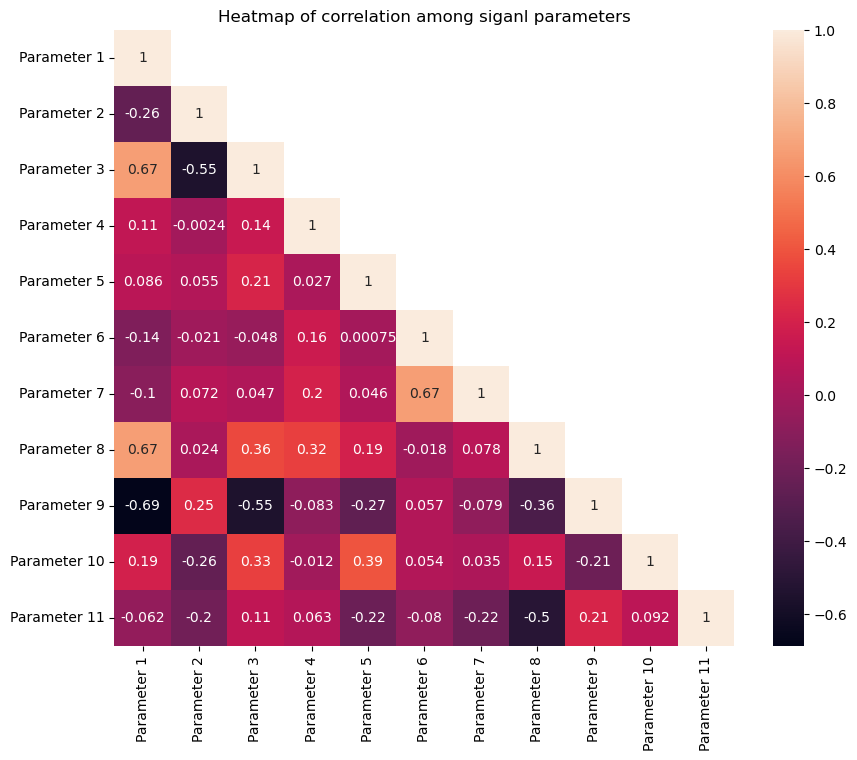

In [16]:
#Generate a heatmap based on the correlation values
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, mask=matrix)
plt.title("Heatmap of correlation among siganl parameters")
plt.show()

**<span style='color:Blue'>Observations</span>**
- As descibed under pairplots, Parameters 1 and 8 are positively correlated (r = 0.67), whereas Parameters 1 and 9 are negatively correlated (r = -0.69)
- Overall Parameters pairs (1, 3); (1, 8), (6, 7) are strongly positively correlated and Parameters pairs (1, 9); (3, 9), (2, 3), (8, 11)  are strongly negatively correlated.

## Data preprocessing

### Split the data into X & Y

In [17]:
X = signal.drop("Signal_Strength", axis=1)
y = signal['Signal_Strength']

In [18]:
X.shape, y.shape

((1359, 11), (1359,))

### Split the data into train & test with 70:30 proportion

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

###  Print shape of all the 4 variables and verify if train and test data is in sync

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


**<span style='color:Blue'>Observations</span>**
- Both the categories of variables (Train and Test) have their number of records for features (X) and class labels (y) in sync.

### Normalise the train and test data with appropriate method

In [21]:
# Scaling training data
X_train_scaled = StandardScaler().fit_transform(X_train)   

# Scaling testing data
X_test_scaled = StandardScaler().fit_transform(X_test)     

In [22]:
# Confirm scaling of train data by verifying statistical summary (mean and std)
pd.DataFrame(X_train_scaled).describe().T

count          mean       std       min       25%       50%       75%  \
0   951.0  2.857861e-16  1.000526 -2.119207 -0.697474 -0.223563  0.546543   
1   951.0  3.007292e-16  1.000526 -2.260403 -0.770966 -0.053830  0.608142   
2   951.0  5.603649e-18  1.000526 -1.397266 -0.932271 -0.053948  0.772709   
3   951.0  2.988613e-17  1.000526 -1.254231 -0.475633 -0.242053  0.069386   
4   951.0  2.017314e-16  1.000526 -1.524165 -0.360503 -0.179935  0.050791   
5   951.0  8.218686e-17  1.000526 -1.420936 -0.842650 -0.264364  0.506684   
6   951.0  1.008657e-16  1.000526 -1.223852 -0.735914 -0.278473  0.453433   
7   951.0  1.092338e-14  1.000526 -3.634075 -0.588768 -0.016052  0.603473   
8   951.0 -2.657998e-15  1.000526 -3.749904 -0.659759 -0.002281  0.589448   
9   951.0 -6.724379e-17  1.000526 -1.629035 -0.618533 -0.225560  0.335830   
10  951.0 -1.074033e-15  1.000526 -1.936234 -0.895669 -0.233491  0.665179   

          max  
0    4.337831  
1    5.793589  
2    3.769341  
3    8.867546  
4   10.493651  
5    5.422115  
6    7.406539  
7    3.568931  
8    4.600063  
9    7.521623  
10   3.361188

In [23]:
# Confirm scaling of test data by verifying statistical summary (mean and std)
pd.DataFrame(X_test_scaled).describe().T

count          mean       std       min       25%       50%       75%  \
0   408.0 -3.374207e-16  1.001228 -2.056855 -0.699371 -0.264976  0.440916   
1   408.0 -5.268117e-16  1.001228 -1.974046 -0.743022 -0.047226  0.621809   
2   408.0  2.612289e-17  1.001228 -1.385189 -0.884651 -0.133845  0.879744   
3   408.0 -1.044916e-16  1.001228 -0.903588 -0.435952 -0.235537  0.031683   
4   408.0 -1.088454e-16  1.001228 -1.130170 -0.388620 -0.196750  0.052162   
5   408.0  1.393221e-16  1.001228 -1.439214 -0.872739 -0.117437  0.543451   
6   408.0  8.707632e-18  1.001228 -1.222726 -0.761807 -0.185659  0.476911   
7   408.0 -5.754003e-14  1.001228 -3.331279 -0.608919  0.014272  0.604664   
8   408.0 -6.900798e-16  1.001228 -2.715189 -0.671740 -0.052513  0.566714   
9   408.0  0.000000e+00  1.001228 -2.146072 -0.694550 -0.232703  0.559036   
10  408.0  2.253100e-15  1.001228 -1.494999 -0.790844 -0.306737  0.617466   

         max  
0   4.078974  
1   4.288120  
2   2.569058  
3   8.649539  
4   7.851404  
5   3.847894  
6   6.612887  
7   3.475884  
8   4.343999  
9   4.649687  
10  3.962202

**<span style='color:Blue'>Observations</span>**
- It can be observed that mean of all the parameters in both scaled train and test data sets have become close to zero and std to 1.
- This confirms the scaling of data

### Transform Labels into format acceptable by Neural Network

In [24]:
# converting y data into categorical (one-hot encoding)
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [25]:
y_train_ohe.shape

(951, 9)

**<span style='color:Blue'>Observations</span>**
- The class labels (3,4,5,6,7,8) have been one hot encoded into 9 dimensional vector (0-8)

## Model Training & Evaluation using Neural Network

### Design a Neural Network to train a classifier

In [26]:
# Clear backend session variables and intitialize random seed values
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [27]:
#Create a model
model1 = Sequential()
model1.add(InputLayer(input_shape=X_train_scaled.shape[1]))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(9, activation='softmax'))

In [28]:
##Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='SGD')

In [29]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 9)                 297       
                                                                 
Total params: 3,145
Trainable params: 3,145
Non-trainable params: 0
_________________________________________________________________


**<span style='color:Blue'>Observations</span>**
- A basic sequential neural network having 2 hidden layers with relu activation functions and one output layer with softmax activation function is designed
- Overall there are 3145 parameters to be trained for this classifier

### Train the classifier using previously designed Architecture

In [30]:
# Fit the model
history_1=model1.fit(X_train_scaled, y_train_ohe, validation_split=0.2, epochs=50,batch_size=32,verbose=1)
print("Finished training the model")

Epoch 1/50
 1/24 [>.............................] - ETA: 3s - loss: 2.3776 - accuracy: 0.0938

2023-02-26 09:53:30.433383: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


24/24 [==============================] - 0s 4ms/step - loss: 2.1286 - accuracy: 0.2395 - val_loss: 2.0108 - val_accuracy: 0.3717
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 1.9242 - accuracy: 0.4053 - val_loss: 1.8221 - val_accuracy: 0.4764
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 1.7528 - accuracy: 0.4697 - val_loss: 1.6554 - val_accuracy: 0.5236
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 1.6083 - accuracy: 0.4961 - val_loss: 1.5175 - val_accuracy: 0.5393
Epoch 5/50
24/24 [==============================] - 0s 956us/step - loss: 1.4938 - accuracy: 0.5158 - val_loss: 1.4090 - val_accuracy: 0.5497
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 1.4063 - accuracy: 0.5237 - val_loss: 1.3270 - val_accuracy: 0.5340
Epoch 7/50
24/24 [==============================] - 0s 933us/step - loss: 1.3418 - accuracy: 0.5355 - val_loss: 1.2679 - val_accuracy: 0.5445
Epoch 8/50
24/24 [=========

In [31]:
#Prediction on the testset data 
model1_y_test_pred = model1.predict(X_test_scaled) 

13/13 [==============================] - 0s 383us/step


In [32]:
# As our outputs are probabilities so we will try to get the output class from the indices of maximum probability values
model1_y_test_pred_final=[]
for i in model1_y_test_pred:
    model1_y_test_pred_final.append(np.argmax(i))

In [33]:
model1_results = model1.evaluate(X_test_scaled, y_test_ohe)
model1_results[1]

13/13 [==============================] - 0s 440us/step - loss: 0.9762 - accuracy: 0.5980


0.5980392098426819

In [34]:
print(classification_report(y_test,model1_y_test_pred_final))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.69      0.70       192
           6       0.49      0.63      0.55       149
           7       0.51      0.38      0.43        48
           8       0.00      0.00      0.00         6

    accuracy                           0.60       408
   macro avg       0.29      0.28      0.28       408
weighted avg       0.58      0.60      0.58       408



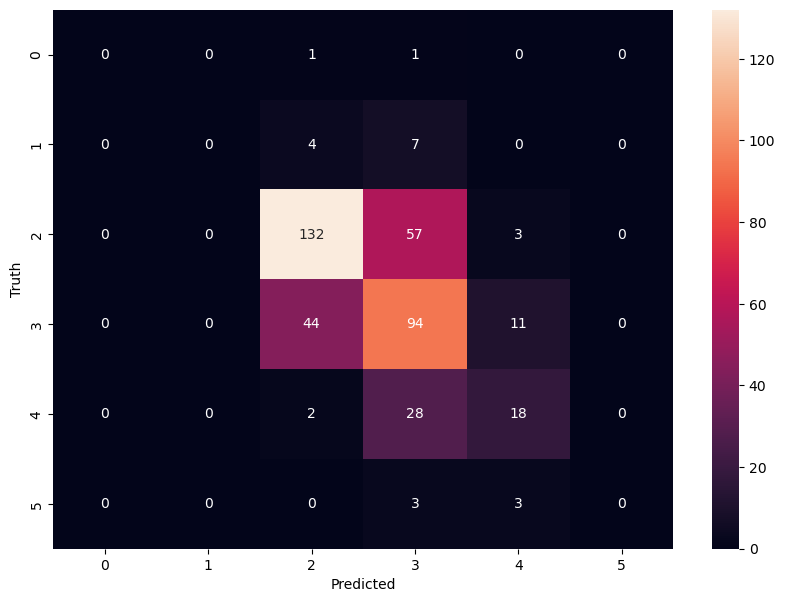

In [35]:
cm=confusion_matrix(y_test,model1_y_test_pred_final)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**<span style='color:Blue'>Observations</span>**
- The base model 1 with two hidden layers achieved overall accuracy of 59.80%
- The precision, recall and F1 scores for majority classes (5, 6, 7) are non-zero i.e. > 0.38
- However, the precision, recall and F1 scores minority classes (3, 4, 8) are zero
- _**This highlights the influence of unbalanced classes in training over its performance in testing**_

### Plot Training Loss and Validation Loss

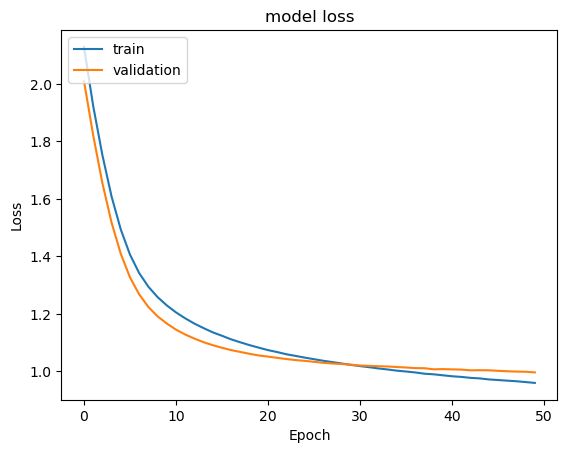

In [36]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Plot Training Accuracy and Validation Accuracy

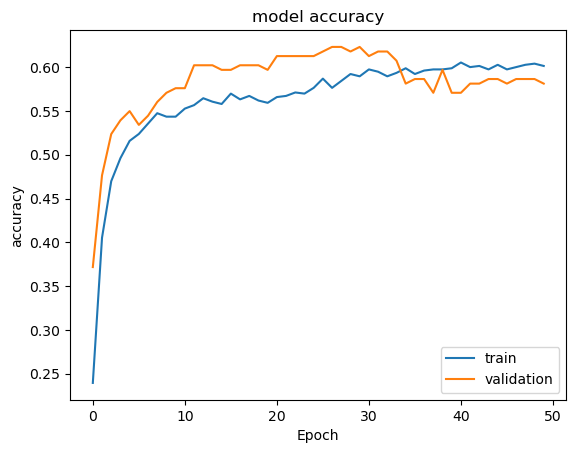

In [37]:
#Plotting Train Accuracy vs Validation Accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

**<span style='color:Blue'>Observations</span>**
- As expected the loss goes on decreasing, and accuracy keeps incresing over the epochs of training
- The trends of loss and accuracy in both training and validation data are well converged
- This shows that model is fitting over the data appropriately

### Design new architecture/update existing architecture to improve the performance of the model

Let's develop series of models by designing new or updating existing architecture to improve the performance in classification.

### Model2

**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 256, 128, 64, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: he_uniform
- Optimizer: adam
- Regularization: Not applied
- Number of Epochs for training: 50
- Batch size for training: 64
- Size of validation data: 20%

In [38]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [39]:
model2 = Sequential()
      #Adding the hidden and output layers
model2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train_scaled.shape[1]))
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(9, activation = 'softmax'))
      #Compiling the ANN with Adam optimizer and categorical cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [40]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 9)                 297       
                                                                 
Total params: 46,601
Trainable params: 46,601
Non-trainable params: 0
_________________________________________________________________


In [41]:
history_2 = model2.fit(X_train_scaled,y_train_ohe,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 0s 7ms/step - loss: 1.6017 - accuracy: 0.4132 - val_loss: 1.3103 - val_accuracy: 0.4764
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1497 - accuracy: 0.5816 - val_loss: 1.2266 - val_accuracy: 0.5236
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0238 - accuracy: 0.6237 - val_loss: 1.0986 - val_accuracy: 0.5707
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9403 - accuracy: 0.6079 - val_loss: 1.1046 - val_accuracy: 0.5550
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.6579 - val_loss: 1.1444 - val_accuracy: 0.5079
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8160 - accuracy: 0.6750 - val_loss: 1.0863 - val_accuracy: 0.5707
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7864 - accuracy: 0.6934 - val_loss: 1.1024 - val_accuracy: 0.5497
Epoch 8/50
12/12 [==

In [42]:
#Prediction on the testdata
model2_y_test_pred = model2.predict(X_test_scaled) 

13/13 [==============================] - 0s 482us/step


In [43]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model2_y_test_final=[]
for i in model2_y_test_pred:
    model2_y_test_final.append(np.argmax(i))

In [44]:
len(model2_y_test_final)

408

In [45]:
model2_results = model2.evaluate(X_test_scaled, y_test_ohe)
model2_results[1]

13/13 [==============================] - 0s 561us/step - loss: 2.3132 - accuracy: 0.5368


0.5367646813392639

In [46]:
#Accuracy as per the classification report 
model2_cr = classification_report(y_test,model2_y_test_final)
print(model2_cr)

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.12      0.18      0.14        11
           5       0.69      0.58      0.63       192
           6       0.47      0.58      0.52       149
           7       0.42      0.40      0.41        48
           8       0.00      0.00      0.00         6

    accuracy                           0.54       408
   macro avg       0.45      0.37      0.39       408
weighted avg       0.56      0.54      0.54       408



### Model3

**Description of the architecture**
- Number of hidden layers: 3 
- Number of nodes in layers: 128, 64, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: he_uniform
- Optimizer: adam
- Regularization: Batch Normalization
- Number of Epochs for training: 50
- Batch size for training: 64
- Size of validation data: 20%

In [47]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [48]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_dim = X_train_scaled.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(9, activation = 'softmax'))

In [49]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 9)                 2

In [50]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [51]:
history_3 = model3.fit(X_train_scaled,y_train_ohe,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 0s 7ms/step - loss: 2.7814 - accuracy: 0.0934 - val_loss: 2.2099 - val_accuracy: 0.0890
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.8755 - accuracy: 0.3882 - val_loss: 2.0335 - val_accuracy: 0.4346
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4675 - accuracy: 0.5355 - val_loss: 1.8672 - val_accuracy: 0.5497
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.2313 - accuracy: 0.6066 - val_loss: 1.7198 - val_accuracy: 0.5393
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0976 - accuracy: 0.6263 - val_loss: 1.5941 - val_accuracy: 0.5759
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0222 - accuracy: 0.6276 - val_loss: 1.5008 - val_accuracy: 0.5602
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9391 - accuracy: 0.6526 - val_loss: 1.4127 - val_accuracy: 0.5445
Epoch 8/50
12/12 [==

In [52]:
#Prediction on the testdata
model3_y_test_pred = model3.predict(X_test_scaled)

13/13 [==============================] - 0s 439us/step


In [53]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model3_y_test_final=[]
for i in model3_y_test_pred:
    model3_y_test_final.append(np.argmax(i))

In [54]:
model3_results = model3.evaluate(X_test_scaled, y_test_ohe)
model3_results[1]

13/13 [==============================] - 0s 513us/step - loss: 1.3874 - accuracy: 0.5735


0.5735294222831726

In [55]:
#Accuracy as per the classification report 
model3_cr = classification_report(y_test,model3_y_test_final)
print(model3_cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.11      0.09      0.10        11
           5       0.70      0.67      0.68       192
           6       0.49      0.59      0.54       149
           7       0.47      0.35      0.40        48
           8       0.00      0.00      0.00         6

    accuracy                           0.57       408
   macro avg       0.30      0.28      0.29       408
weighted avg       0.57      0.57      0.57       408



### Model4
**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 256, 128, 64, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: Not applied
- Optimizer: adam
- Regularization: Dropout
- Number of Epochs for training: 50
- Batch size for training: 64
- Size of validation data: 20%

In [56]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [57]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_dim = X_train_scaled.shape[1]))
model4.add(Dropout(0.2))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(9, activation = 'softmax'))

In [58]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [59]:
optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [60]:
history_4 = model4.fit(X_train_scaled,y_train_ohe,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 0s 7ms/step - loss: 1.9527 - accuracy: 0.3855 - val_loss: 1.6203 - val_accuracy: 0.4136
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.4858 - accuracy: 0.4513 - val_loss: 1.2491 - val_accuracy: 0.5759
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 1.3086 - accuracy: 0.5118 - val_loss: 1.1677 - val_accuracy: 0.5654
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1625 - accuracy: 0.5645 - val_loss: 1.1161 - val_accuracy: 0.5759
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 1.1261 - accuracy: 0.5829 - val_loss: 1.0783 - val_accuracy: 0.5550
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.5671 - val_loss: 1.0616 - val_accuracy: 0.5550
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0594 - accuracy: 0.5618 - val_loss: 1.0427 - val_accuracy: 0.5497
Epoch 8/50
12/12 [==

In [61]:
#Prediction on the testdata
model4_y_test_pred = model4.predict(X_test_scaled)

13/13 [==============================] - 0s 478us/step


In [62]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model4_y_test_final=[]
for i in model4_y_test_pred:
    model4_y_test_final.append(np.argmax(i))

In [63]:
model4_results = model4.evaluate(X_test_scaled, y_test_ohe)
model4_results[1]

13/13 [==============================] - 0s 585us/step - loss: 1.0874 - accuracy: 0.5858


0.5857843160629272

In [64]:
#Accuracy as per the classification report 
model4_cr = classification_report(y_test,model4_y_test_final)
print(model4_cr)

              precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.00      0.00      0.00        11
           5       0.73      0.67      0.70       192
           6       0.51      0.59      0.54       149
           7       0.43      0.44      0.43        48
           8       0.00      0.00      0.00         6

    accuracy                           0.59       408
   macro avg       0.31      0.37      0.33       408
weighted avg       0.58      0.59      0.58       408



### Model5
- This model was built by using **RandomSearchCV** with estimator designed using **Keras classifier.**
- **Model was tuned with different batch sizes and learning rates with 3 fold cross validation.**

**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 256, 128, 64, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: Not applied
- Optimizer: adam
- Regularization: Dropout
- Number of Epochs for training: 50
- Batch size for training: Picked through RandomSearchCV
- Size of validation data: 20%

In [65]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [66]:
def create_model5(lr):  
    np.random.seed(1337)
    model5 = Sequential()
    model5.add(Dense(256,activation='relu',input_dim = X_train_scaled.shape[1]))
    model5.add(Dropout(0.3))
    model5.add(Dense(128,activation='relu'))
    model5.add(Dropout(0.3))
    model5.add(Dense(64,activation='relu'))
    model5.add(Dropout(0.2))
    model5.add(Dense(32,activation='relu')) 
    model5.add(Dense(9, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model5.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model5

In [67]:
keras_estimator = KerasClassifier(build_fn=create_model5, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
randomCV= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [68]:
random_result = randomCV.fit(X_train_scaled, y_train_ohe,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


2023-02-26 09:53:40.809697: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:40.982509: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:40.996516: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:40.999986: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:41.015224: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:41.043849: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:41.071845: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-26 09:53:41.088669: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 1ms/step - loss: 1.8483 - accuracy: 0.1293


3/3 [==============================] - 0s 968us/step - loss: 1.9620 - accuracy: 0.3817


24/24 [==============================] - 0s 4ms/step - loss: 1.3504 - accuracy: 0.4763 - val_loss: 1.0491 - val_accuracy: 0.5393
Best: 0.515247 using {'lr': 0.01, 'batch_size': 32}


In [69]:
random_result.best_params_

{'lr': 0.01, 'batch_size': 32}

In [70]:
estimator_v5=create_model5(lr=random_result.best_params_['lr'])
estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [71]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v5.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train_scaled, y_train_ohe, epochs=50, batch_size = random_result.best_params_['batch_size'],verbose=1,validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3483 - accuracy: 0.4842 - val_loss: 1.0992 - val_accuracy: 0.5131
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1180 - accuracy: 0.5592 - val_loss: 1.0472 - val_accuracy: 0.5864
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0579 - accuracy: 0.5513 - val_loss: 1.0414 - val_accuracy: 0.5497
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0660 - accuracy: 0.5632 - val_loss: 1.0239 - val_accuracy: 0.6021
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.5355 - val_loss: 1.0129 - val_accuracy: 0.5812
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9985 - accuracy: 0.5789 - val_loss: 0.9625 - val_accuracy: 0.6387
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.9884 - accuracy: 0.5789 - val_loss: 0.9757 - val_accuracy: 0.5497
Epoch 8/50
24/24 [==

In [72]:
#Prediction on the testdata
model5_y_test_pred = estimator_v5.predict(X_test_scaled)

13/13 [==============================] - 0s 469us/step


In [73]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model5_y_test_final=[]
for i in model5_y_test_pred:
    model5_y_test_final.append(np.argmax(i))

In [74]:
model5_results = estimator_v5.evaluate(X_test_scaled, y_test_ohe)
model5_results[1]

13/13 [==============================] - 0s 511us/step - loss: 1.0692 - accuracy: 0.6152


0.6151960492134094

In [75]:
#Accuracy as per the classification report 
model5_cr = classification_report(y_test,model5_y_test_final)
print(model5_cr)

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00        11
           5       0.70      0.79      0.74       192
           6       0.54      0.57      0.55       149
           7       0.47      0.29      0.36        48
           8       0.00      0.00      0.00         6

    accuracy                           0.62       408
   macro avg       0.34      0.36      0.34       408
weighted avg       0.58      0.62      0.59       408



### Model6
- This model was built by using **GridSearchCV** with estimator designed using **Keras classifier.**
- **Model was tuned with different batch sizes and learning rates with 3 fold cross validation.**

**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 256, 128, 64, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: Not applied
- Optimizer: adam
- Regularization: Dropout
- Number of Epochs for training: 50
- Batch size for training: Picked through RandomSearchCV
- Size of validation data: 20%

In [76]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [77]:
def create_model6(lr):  
    np.random.seed(1337)
    model6 = Sequential()
    model6.add(Dense(256,activation='relu',input_dim = X_train_scaled.shape[1]))
    model6.add(Dropout(0.3))
    model6.add(Dense(128,activation='relu'))
    model6.add(Dropout(0.3))
    model6.add(Dense(64,activation='relu'))
    model6.add(Dropout(0.2))
    model6.add(Dense(32,activation='relu')) 
    model6.add(Dense(9, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model6.compile(optimizer = optimizer,loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model6

In [78]:
keras_estimator = KerasClassifier(build_fn=create_model6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
model6_grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [79]:
model6_grid_result = model6_grid.fit(X_train_scaled, y_train_ohe ,validation_split=0.2,verbose=1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
8/8 [==============================] - 1s 18ms/step - loss: 1.6131 - accuracy: 0.4142 - val_loss: 1.2219 - val_accuracy: 0.4882


24/24 [==============================] - 0s 4ms/step - loss: 1.3504 - accuracy: 0.4763 - val_loss: 1.0491 - val_accuracy: 0.5393


In [80]:
# Summarize results
print("Best: %f using %s" % (model6_grid_result.best_score_, model6_grid_result.best_params_))

Best: 0.572029 using {'batch_size': 32, 'lr': 0.01}


In [81]:
estimator_v6=create_model6(lr=model6_grid_result.best_params_['lr'])
estimator_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [82]:
optimizer = tf.keras.optimizers.Adam(model6_grid_result.best_params_['lr'])
estimator_v6.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_6 =estimator_v6.fit(X_train_scaled, y_train_ohe, epochs=50, batch_size = model6_grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 1.3483 - accuracy: 0.4842 - val_loss: 1.0992 - val_accuracy: 0.5131
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 1.1180 - accuracy: 0.5592 - val_loss: 1.0472 - val_accuracy: 0.5864
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.5513 - val_loss: 1.0414 - val_accuracy: 0.5497
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0660 - accuracy: 0.5632 - val_loss: 1.0239 - val_accuracy: 0.6021
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.5355 - val_loss: 1.0129 - val_accuracy: 0.5812
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9985 - accuracy: 0.5789 - val_loss: 0.9625 - val_accuracy: 0.6387
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.9884 - accuracy: 0.5789 - val_loss: 0.9757 - val_accuracy: 0.5497
Epoch 8/50
24/24 [==

In [83]:
#Prediction on the testdata
model6_y_test_pred = estimator_v6.predict(X_test_scaled)

13/13 [==============================] - 0s 494us/step


In [84]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model6_y_test_final=[]
for i in model6_y_test_pred:
    model6_y_test_final.append(np.argmax(i))

In [85]:
model6_results = estimator_v6.evaluate(X_test_scaled, y_test_ohe)
model6_results[1]

13/13 [==============================] - 0s 515us/step - loss: 1.0692 - accuracy: 0.6152


0.6151960492134094

In [86]:
#Accuracy as per the classification report 
model6_cr = classification_report(y_test,model6_y_test_final)
print(model6_cr)

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.00      0.00      0.00        11
           5       0.70      0.79      0.74       192
           6       0.54      0.57      0.55       149
           7       0.47      0.29      0.36        48
           8       0.00      0.00      0.00         6

    accuracy                           0.62       408
   macro avg       0.34      0.36      0.34       408
weighted avg       0.58      0.62      0.59       408



### Model 7

- **To build this model we first balanced the classes in input data using `SMOTE` function in `imblearn` package**

**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 160, 160, 224, 128
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: he_uniform
- Optimizer: adam
- Number of Epochs for training: 50
- Size of validation data: 20%

**Note**
- The number of layers, nodes, learning rate for this model were determined using RandomSearch functionality in keras_tuner package in Google colab environment over GPU-based hardware accelerator. 
- The kras_tuner based code run for hyperparamter tuning in the Google Colab is available in the Appendix section at the bottom of this notebook. The code is not executed in this notebook on laptop due to time and hardware constraints.

In [87]:
#Apply SMOTE technique to balance the dataset
sm = SMOTE(sampling_strategy= 'auto', random_state= 1 )
X_sm, y_sm = sm.fit_resample(X, y)

In [88]:
X_sm.shape, y_sm.shape

((3462, 11), (3462,))

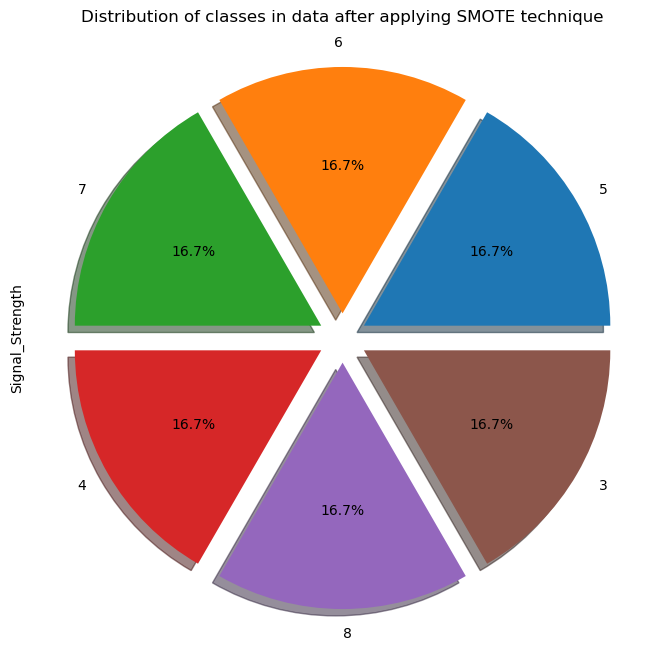

In [89]:
#Distribution of the frequency count of the target column(Signal Strength) after applying SMOTE technique
plt.figure(figsize=(8,8))
pd.Series(y_sm).value_counts().plot(kind='pie', legend=False, \
                   autopct='%1.1f%%', explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), \
                   shadow=True, startangle=0);
plt.title("Distribution of classes in data after applying SMOTE technique")
plt.show();

**<span style='color:Blue'>Observations</span>**
- As can be observed from the pie chart, application of SMOTE technique has helped in achieving equal distribution of records over all the classes in the data set.
- Hence this data provides a good input for training purpose, over the imbalanced data as shown in Q. 1D.

In [90]:
# Train, Test Split on balanced data obtained using SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = 7)

In [91]:
# Scaling training data
X_train_scaled_sm = StandardScaler().fit_transform(X_train_sm)   

# Scaling testing data
X_test_scaled_sm = StandardScaler().fit_transform(X_test_sm)     

In [92]:
# converting y data into categorical (one-hot encoding)
y_train_sm_ohe = to_categorical(y_train_sm)
y_test_sm_ohe = to_categorical(y_test_sm)

**Note**

- **To train and test the model 7, we freshly created class-balanced training and test sets using `SMOTE-technique`**.
- Comparison of all the models, we will be done using both the types of test data sets 
    - 1) without SMOTE techniques (as used in previous models 1-6) and 
    - 2) with SMOTE-technique as generated for model 7.

In [93]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [94]:
model7 = Sequential()
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train_scaled_sm.shape[1]))
model7.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model7.add(Dense(9, activation = 'softmax'))

In [95]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [96]:
X_train_scaled_sm.shape

(2423, 11)

In [97]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1920      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 93,705
Trainable params: 93,705
Non-trainable params: 0
_________________________________________________________________


In [98]:
history_7 = model7.fit(X_train_scaled_sm,y_train_sm_ohe,batch_size=64,epochs=50,verbose=1,validation_split = 0.20)

Epoch 1/50
31/31 [==============================] - 0s 3ms/step - loss: 1.2804 - accuracy: 0.5165 - val_loss: 0.9916 - val_accuracy: 0.5979
Epoch 2/50
31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - accuracy: 0.6950 - val_loss: 0.8567 - val_accuracy: 0.6619
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.7307 - val_loss: 0.8315 - val_accuracy: 0.6660
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7755 - val_loss: 0.8175 - val_accuracy: 0.7278
Epoch 5/50
31/31 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7910 - val_loss: 0.7658 - val_accuracy: 0.6990
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.8287 - val_loss: 0.7010 - val_accuracy: 0.7381
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8488 - val_loss: 0.6779 - val_accuracy: 0.7340
Epoch 8/50
31/31 [==

In [99]:
#Prediction on the testdata
model7_y_test_pred = model7.predict(X_test_scaled_sm)

33/33 [==============================] - 0s 479us/step


In [100]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
model7_y_test_final=[]
for i in model7_y_test_pred:
    model7_y_test_final.append(np.argmax(i))

In [101]:
model7_results_SM = model7.evaluate(X_test_scaled_sm, y_test_sm_ohe)
model7_results_SM[1]

33/33 [==============================] - 0s 569us/step - loss: 1.0939 - accuracy: 0.8017


0.8017324209213257

In [102]:
#Accuracy as per the classification report 
model7_cr = classification_report(y_test_sm, model7_y_test_final)
print(model7_cr)

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       173
           4       0.88      0.93      0.90       163
           5       0.60      0.64      0.62       175
           6       0.60      0.38      0.47       177
           7       0.80      0.88      0.84       182
           8       0.89      1.00      0.94       169

    accuracy                           0.80      1039
   macro avg       0.79      0.80      0.79      1039
weighted avg       0.79      0.80      0.79      1039



## Run all the models (1-7) on the balanced test data obtained by applying SMOTE

In [103]:
#### Run all the old models on the upscaled data after applying SMOTE
model1_results_SM = model1.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model1_results_SM[1])
model2_results_SM = model2.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model2_results_SM[1])
model3_results_SM = model3.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model3_results_SM[1])
model4_results_SM = model4.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model4_results_SM[1])
model5_results_SM = estimator_v5.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model5_results_SM[1])
model6_results_SM = estimator_v6.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model6_results_SM[1])
model7_results_SM = model7.evaluate(X_test_scaled_sm, y_test_sm_ohe)
print(model7_results_SM[1])

33/33 [==============================] - 0s 443us/step - loss: 2.4189 - accuracy: 0.2839
0.2839268445968628
33/33 [==============================] - 0s 1ms/step - loss: 2.7149 - accuracy: 0.4880
0.48796918988227844
33/33 [==============================] - 0s 752us/step - loss: 2.2604 - accuracy: 0.4206
0.420596718788147
33/33 [==============================] - 0s 533us/step - loss: 1.7698 - accuracy: 0.3850
0.3849855661392212
33/33 [==============================] - 0s 547us/step - loss: 1.7726 - accuracy: 0.3022
0.3022136688232422
33/33 [==============================] - 0s 514us/step - loss: 1.7726 - accuracy: 0.3022
0.3022136688232422
33/33 [==============================] - 0s 577us/step - loss: 1.0939 - accuracy: 0.8017
0.8017324209213257


## Run all the models (1-7) on the previous imbalanced test data (without SMOTE)

In [104]:
#### Run all the old models on the upscaled data after applying SMOTE
model1_results = model1.evaluate(X_test_scaled, y_test_ohe)
print(model1_results[1])
model2_results = model2.evaluate(X_test_scaled, y_test_ohe)
print(model2_results[1])
model3_results = model3.evaluate(X_test_scaled, y_test_ohe)
print(model3_results[1])
model4_results = model4.evaluate(X_test_scaled, y_test_ohe)
print(model4_results[1])
model5_results = estimator_v5.evaluate(X_test_scaled, y_test_ohe)
print(model5_results[1])
model6_results = estimator_v6.evaluate(X_test_scaled, y_test_ohe)
print(model6_results[1])
model7_results = model7.evaluate(X_test_scaled, y_test_ohe)
print(model7_results[1])

13/13 [==============================] - 0s 499us/step - loss: 0.9762 - accuracy: 0.5980
0.5980392098426819
13/13 [==============================] - 0s 619us/step - loss: 2.3132 - accuracy: 0.5368
0.5367646813392639
13/13 [==============================] - 0s 512us/step - loss: 1.3874 - accuracy: 0.5735
0.5735294222831726
13/13 [==============================] - 0s 633us/step - loss: 1.0874 - accuracy: 0.5858
0.5857843160629272
13/13 [==============================] - 0s 627us/step - loss: 1.0692 - accuracy: 0.6152
0.6151960492134094
13/13 [==============================] - 0s 568us/step - loss: 1.0692 - accuracy: 0.6152
0.6151960492134094
13/13 [==============================] - 0s 736us/step - loss: 1.7140 - accuracy: 0.6642
0.6642156839370728


## 3E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

**Summary of model performance on test data sets obtained with and without SMOTE**

In [105]:
#Summary of the Models with SMOTE 
models_summary_SMOTE = pd.DataFrame({
    "Model" : ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7'],
    
    "Optimizer" : ['SGD', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam', 'Adam'],
    
    "kernel_initializer" : ['None', 'he_uniform', 'he_uniform', 'None', 'None', 'None', 'he_uniform'],
    
    "Hyperparameters" : ["None", "None", "Batch Normalization", "Dropout", "RandomizedSearchCV", "GridSearchCV",
               "Keras Tuner - Google Colab"],
    
    "Accuracy on test data (with SMOTE)" : [model1_results_SM[1], model2_results_SM[1], model3_results_SM[1], model4_results_SM[1],
                    model5_results_SM[1], model6_results_SM[1], model7_results_SM[1]],

     "Accuracy on test data (without SMOTE)" : [model1_results[1], model2_results[1], model3_results[1], model4_results[1],
                    model5_results[1], model6_results[1], model7_results[1]]
    
}).sort_values(by="Accuracy on test data (with SMOTE)", ascending=False).reset_index(drop=True)
models_summary_SMOTE

Model Optimizer kernel_initializer             Hyperparameters  \
0  Model7      Adam         he_uniform  Keras Tuner - Google Colab   
1  Model2      Adam         he_uniform                        None   
2  Model3      Adam         he_uniform         Batch Normalization   
3  Model4      Adam               None                     Dropout   
4  Model5      Adam               None          RandomizedSearchCV   
5  Model6      Adam               None                GridSearchCV   
6  Model1       SGD               None                        None   

   Accuracy on test data (with SMOTE)  Accuracy on test data (without SMOTE)  
0                            0.801732                               0.664216  
1                            0.487969                               0.536765  
2                            0.420597                               0.573529  
3                            0.384986                               0.585784  
4                            0.302214                               0.615196  
5                            0.302214                               0.615196  
6                            0.283927                               0.598039

**<span style='color:Blue'>Observations</span>**
- It can be observed that the Model 7 shows best performance in classification of both the test data sets (with and without SMOTE) with accuracies of 80.17% and 66.42% respectively. 
- Model 7 shows significant increase in performance over the base model i.e. Model 1.

### Comparison of training and validation loss between base model (Model 1) and best model (Model 7)

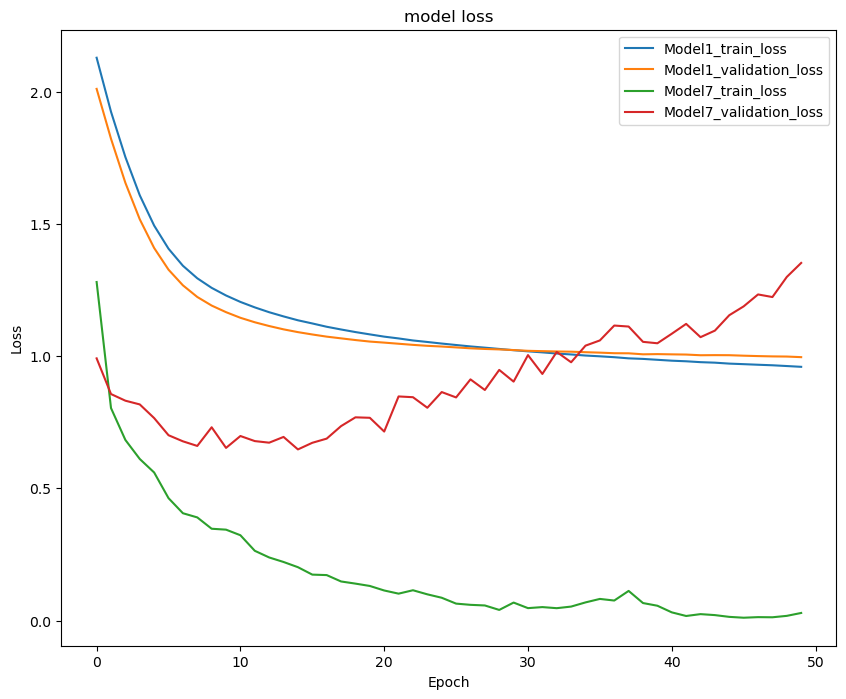

In [106]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(10,8))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model1_train_loss', 'Model1_validation_loss', 'Model7_train_loss', 'Model7_validation_loss'], loc='upper right')
plt.show()

**<span style='color:Blue'>Observations</span>**
- The `training vs validation loss` for the `Model 1` are well `converged` and shows a good fit for the classification
- The `training vs validation loss` for the `Model 8` are `diverged`. The validation loss is higher than the training loss, so it shows model is `overfitting` on data for the classification. It may be due to `under-representation of classes` in the validation data set.
- However the overall validation and training loss for Model 7, on average, is lower than that for Model 1.
- Model 7 still shows better accuracy in classification of test data, thus proves to be superior over Model 1 as shown below.

**Note**

- There is still a scope for optimization of this model by trying larger epoch, different batch sizes, regularization techniques and variable number of layers/nodes. However given the time and hardware constraints Model 7 was selected to be the best based on the accuracy achieved on test data. 

### Comparison of training and validation accuracy between base model (Model 1) and best model (Model 7)

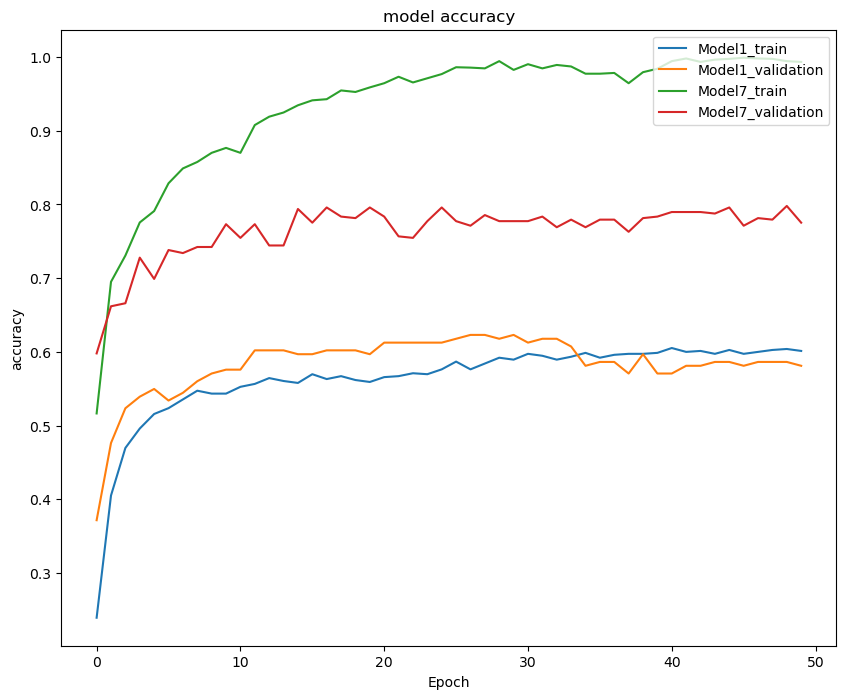

In [107]:
#Plotting Train Accuracy vs Validation Accuracy
plt.figure(figsize=(10,8))

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])

plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Model1_train', 'Model1_validation', 'Model7_train', 'Model7_validation'], loc='upper right')
plt.show()

**<span style='color:Blue'>Observations</span>**
- The training and validation accuracy of Model 7 is consistently higher than Model 1

**<span style='color:Blue'>Conclusions</span>**

- The base model (Model1) was created with 2 hidden layers using stochastic gradient dense optimizer on the imbalanced dataset. This resulted in an accuracy of ~60% on the test dataset. 

- Inorder to improve the performance over base model, different models were generated using Adam optimizer and following changes in the architecture of the neural network,
    - Increase in the number of hidden layers
    - Initializing random weights using kernel initializer
    - Regularization technique (batch normalisation and dropout)
    - Hyperparameter tuning (learning rate and batchsize) using RandomSearchCV and GridSearchCV
    - Tuning of the number of layers, nodes and learning rate using Keras_tuner in Google Colab

- From the exploratory data analysis, we identified that the dataset was imblanced and there would be a need to balance the dataset inorder to generate a good model.

    - In order to balance the classes in data, SMOTE technique was applied on the imbalanced dataset
    - Using this balanced data, Model 7 was trained and found to give best performance on test data sets genrated with and without SMOTE technique

- The best model (Model 7) resulted in a test accuracy of 80.17% on the balanced set and 66.42% on the imbalanced dataset which is significantly higher than the base model (Model 1) that resulted in a test accuracy of 28.39% on the balanced set and 59.80% on the imbalanced dataset.

# Part B

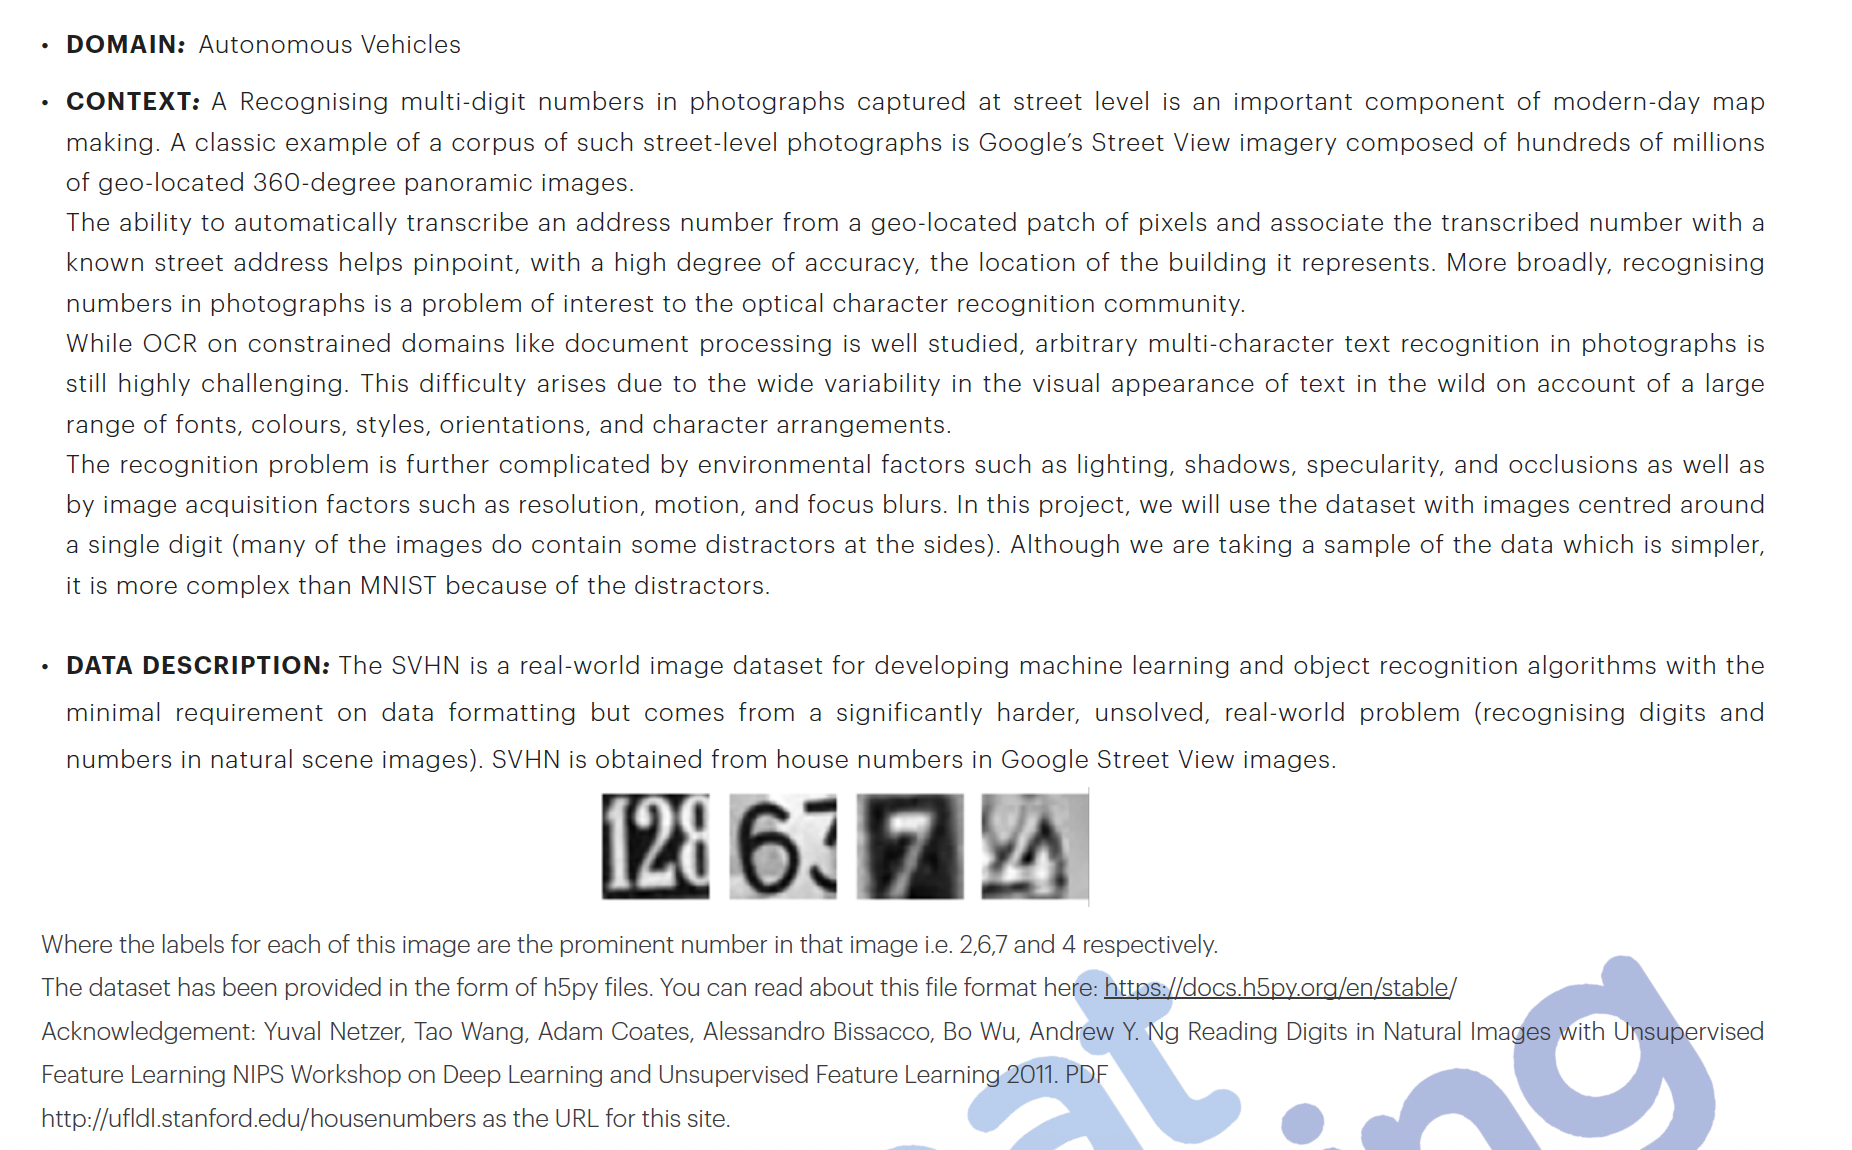

## Data Import and Exploration

### Read the .h5 file and assign to a variable

In [108]:
# Using File() function from h5py package to import .h5 file
h5f = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r')

### Print all the keys from the .h5 file

In [109]:
print(h5f.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


**<span style='color:Blue'>Observations</span>**
- The data is divided into Train, Test and Validation sets

### Split the data into X_train, X_test, Y_train, Y_test

In [110]:
# X_train and X_test 
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]

# Y_train and Y_test
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]

# X_val and Y_val to be used as validation data during training
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]


## Data Visualisation and preprocessing

### Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync

In [111]:
print("shape of X train data", X_train.shape)
print("shape of y train data", y_train.shape)
print("shape of X test data", X_test.shape)
print("shape of y test data", y_test.shape)

shape of X train data (42000, 32, 32)
shape of y train data (42000,)
shape of X test data (18000, 32, 32)
shape of y test data (18000,)


**<span style='color:Blue'>Observations</span>**
- The above shape shows that both X and y train and test data are in sync.

### Visualise first 10 images in train data and print its corresponding labels

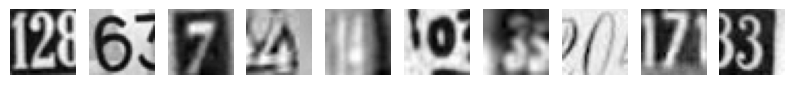

Corresponding label for each of the above images: [2 6 7 4 4 0 3 0 7 3]


In [112]:
#Printing the first 10 images with its labels in train data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('Corresponding label for each of the above images: %s' % (y_train[0:10]))

### Reshape all the images with appropriate shape update the data in same variable

In [113]:
X_train.shape

(42000, 32, 32)

**<span style='color:Blue'>Observations</span>**
- It can be seen that image data is saved as 32*32 pixel sizes. Let's use this information to reshape the data

In [114]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_val  = X_val.reshape(X_val.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

In [115]:
# Check shape after rehaping the data
X_train.shape, X_test.shape, X_val.shape

((42000, 1024), (18000, 1024), (60000, 1024))

### Normalise the images i.e. Normalise the pixel values

In [116]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Validation set (60000, 1024) (60000,)
Test set (18000, 1024) (18000,)


### Transform Labels into format acceptable by Neural Network

In [117]:
#Check the number of classes/digits represented in the images
len(np.unique(y_train))

10

In [118]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test,num_classes)

In [119]:
print("First 5 training lables as one-hot encoded vectors:\n", y_train_cat[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [120]:
y_train[:5]

array([2, 6, 7, 4, 4], dtype=uint8)

### Print total Number of classes in the Dataset

In [121]:
#Number of classes in training set
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [122]:
#Number of classes in test set
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [123]:
#Count of the total number of classes in train and test data
print("Total number of classes in training dataset", len(np.unique(y_train)))
print("Total number of classes in test dataset", len(np.unique(y_test)))

Total number of classes in training dataset 10
Total number of classes in test dataset 10


### Model Training & Evaluation using Neural Network

### Design a Neural Network to train a classifier

In [124]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [125]:
image_size=32*32

**Description of the architecture**
- Number of hidden layers: 4 
- Number of nodes in layers: 256, 128, 96, 32
- Activation function(s): relu in hidden layer, softmax in output layer
- Kernel initializer: he_normal
- Optimizer: adam
- Regularization: Batch normalization and dropout
- Number of Epochs for training: 100
- Batch size for training: Tuned using GridSearchCV
- Learning rate: Tuned using GridSearchCV
- Validation was done using split validation data as described in previous question

In [126]:
# Function to build model with given learning rate
def mlp_model(lr):
    model_digi_0 = Sequential()
    model_digi_0.add(Dense(256, input_shape = (image_size, ), kernel_initializer='he_normal'))
    model_digi_0.add(BatchNormalization())
    model_digi_0.add(Activation('relu'))
    model_digi_0.add(Dropout(0.2))
    model_digi_0.add(Dense(128, kernel_initializer='he_normal'))
    model_digi_0.add(BatchNormalization())
    model_digi_0.add(Activation('relu'))    
    model_digi_0.add(Dropout(0.2))
    model_digi_0.add(Dense(96, kernel_initializer='he_normal'))
    model_digi_0.add(BatchNormalization())
    model_digi_0.add(Activation('relu'))
    model_digi_0.add(Dropout(0.2))
    model_digi_0.add(Dense(32, kernel_initializer='he_normal'))
    model_digi_0.add(BatchNormalization())
    model_digi_0.add(Activation('relu'))
    model_digi_0.add(Dropout(0.2))
    model_digi_0.add(Dense(num_classes, kernel_initializer='he_normal'))
    model_digi_0.add(Activation('softmax'))
    
    optimizer = optimizers.Adam(learning_rate = lr)
    model_digi_0.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model_digi_0

### Train the classifier using previously designed Architecture (Use best suitable parameters)

In [127]:
# Define estimator using KerasClassifier based on mlp_model() function
keras_estimator = KerasClassifier(build_fn=mlp_model, verbose=1)

In [128]:
# Define the parameters for GridSearchCV
param_grid = {
    'batch_size':[32, 64],
    "lr":[0.01,0.001],
    "epochs":[100]
}

In [129]:
# Number of cross validation folds
kfold_splits = 5

In [130]:
# Define GridSearchCV using estimator, param grid and number of folds
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [131]:
# Hyperparameter tuning using GridSearhCV
grid_result = grid.fit(X_train, y_train_cat,validation_data=(X_val,y_val_cat),verbose=1) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
1050/1050 [==============================] - 15s 13ms/step - loss: 2.0830 - accuracy: 0.2522 - val_loss: 1.6926 - val_accuracy: 0.4111
Epoch 2/100
1050/1050 [==============================] - 15s 13ms/step - loss: 2.0820 - accuracy: 0.2530 - val_loss: 1.6690 - val_accuracy: 0.4497
Epoch 2/100
1050/1050 [==============================] - 15s 14ms/step - loss: 2.0100 - accuracy: 0.2613 - val_loss: 1.6775 - val_accuracy: 0.3938
Epoch 2/100
1050/1050 [==============================] - 15s 13ms/step - loss: 2.0734 - accuracy: 0.2201 - val_loss: 1.8429 - val_accuracy: 0.3541
Epoch 2/100
1050/1050 [==============================] - 15s 14ms/step - loss: 1.9941 - accuracy: 0.2672 - val_loss: 2.2539 - val_accuracy: 0.2095
Epoch 2/100
1050/1050 [==============================] - 16s 14ms/step - loss: 2.0754 - accuracy: 0.2587 - val_loss: 1.82

In [132]:
# Print best parameters
grid_result.best_params_

{'batch_size': 32, 'epochs': 100, 'lr': 0.001}

In [133]:
# Best score of the model
grid_result.best_score_

0.8123095273971558

In [134]:
# Build model with best learning rate parameter
model_estimator=mlp_model(lr=grid_result.best_params_['lr'])
model_estimator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                      

In [135]:
# Compile and train best model
best_optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
model_estimator.compile(loss='categorical_crossentropy',optimizer=best_optimizer,metrics=['accuracy'])
history_digit_model= model_estimator.fit(X_train, y_train_cat, epochs=grid_result.best_params_['epochs'], batch_size = grid_result.best_params_['batch_size'] , verbose=1, validation_data=(X_val,y_val_cat))

Epoch 1/100
1313/1313 [==============================] - 5s 3ms/step - loss: 1.9800 - accuracy: 0.2940 - val_loss: 1.5856 - val_accuracy: 0.4539
Epoch 2/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4874 - accuracy: 0.5024 - val_loss: 1.2531 - val_accuracy: 0.5818
Epoch 3/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.3026 - accuracy: 0.5836 - val_loss: 1.1637 - val_accuracy: 0.6317
Epoch 4/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.2008 - accuracy: 0.6214 - val_loss: 1.2567 - val_accuracy: 0.6008
Epoch 5/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1282 - accuracy: 0.6450 - val_loss: 1.0798 - val_accuracy: 0.6569
Epoch 6/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0688 - accuracy: 0.6662 - val_loss: 1.0552 - val_accuracy: 0.6709
Epoch 7/100
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0212 - accuracy: 0.6860 - val_loss: 0.9609 - val_ac

In [136]:
# predicting the model on test data
y_prediction_digit= model_estimator.predict(X_test)

563/563 [==============================] - 0s 567us/step


In [137]:
# As our outputs are probabilities so we will try to get the output class from the indices of maximum probability values
y_prediction_digit_final=[]
for i in y_prediction_digit:
    y_prediction_digit_final.append(np.argmax(i))

In [138]:
results = model_estimator.evaluate(X_test, y_test_cat)

563/563 [==============================] - 0s 670us/step - loss: 0.5269 - accuracy: 0.8399


In [139]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8399444222450256


### Evaluate performance of the model with appropriate metrics

**Classification Report**

In [140]:
print(classification_report(y_test,y_prediction_digit_final))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1814
           1       0.81      0.86      0.84      1828
           2       0.80      0.89      0.85      1803
           3       0.81      0.79      0.80      1719
           4       0.93      0.85      0.89      1812
           5       0.89      0.78      0.83      1768
           6       0.87      0.77      0.82      1832
           7       0.84      0.91      0.88      1808
           8       0.73      0.85      0.79      1812
           9       0.86      0.81      0.84      1804

    accuracy                           0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000



In [141]:
print("The above classification report shows that the model was able to predict the classes (digits in the image) with an overall accuracy of ", round(results[1], 2))

The above classification report shows that the model was able to predict the classes (digits in the image) with an overall accuracy of  0.84


**<span style='color:Blue'>Observations</span>**

- The precision, reacll and F1 scores for most of the classes is >=80%
- Overall higher precision and recall values for the above classes shows that the model is good in predicting those digits correctly.

**Confusion Matrix**

In [142]:
cm=confusion_matrix(y_test,y_prediction_digit_final)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**<span style='color:Blue'>Observations</span>**
- As can be seen from the higher diagonal values, most of the digit images are correctly predicted/classified i.e. True positives.
- It can be observed from the confusion matrix that most of the interchangeably misclassified digits have similar appearance. e.g. Digit 6 is most of the times predicted as 8.
- The rate of misclassification can further be reduced by using techniques such as data augmentation.

### Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write observations on the same.

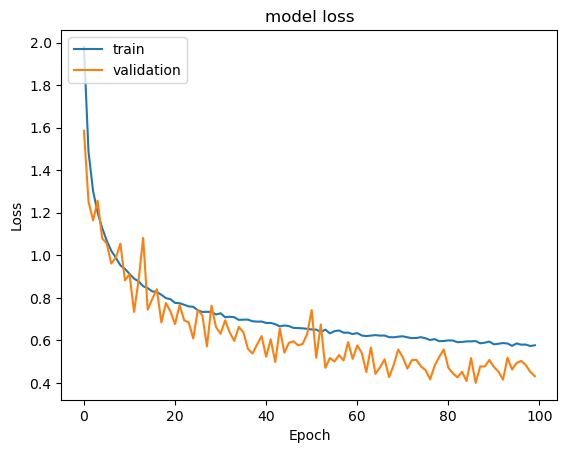

In [143]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_digit_model.history['loss'])
plt.plot(history_digit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**<span style='color:Blue'>Observations</span>**
- The `training vs validation loss` for the model are `almost converging` with a bit of `noise in validation set`. 
- This noise in validation curve might be explained by `dropout of fraction of nodes` in training phase, which are set to zero. However in the testing phase the model will be `more robust` as all the features/nodes will be used for prediction.

In [144]:
#Plotting Train Accuracy vs Validation Accuracy
plt.plot(history_digit_model.history['accuracy'])
plt.plot(history_digit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

**<span style='color:Blue'>Observations</span>**
- It can be observed from the accuracy curves that model is well fitted for the data as both training and validation accuracies are well converged.

# Appendix

### A piece of code used to run keras tuner based estimator for hyperparameter tuning to build Model 7 as described in PART A, Q3D. 

- The hyperparameter tuning was carried out using GPU-based hardware accelerator in Google Colab. Due to time and hardware constraints it was not executed locally on laptop. 

```
def build_model7(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

#RandomSearch using keras_tuner for building the model with optimal parameters values
tuner_model7 = RandomSearch(
    build_model7,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

tuner_model7.search_space_summary()

### Searching the best model on X and y train

tuner_model7.search(X_train_scaled_sm, y_train_sm_ohe, epochs=50, validation_split = 0.2)

## Printing the best models with their parameters
tuner_model7.results_summary()
```